In [1]:
# Module 1: Data Wrangling with Python

In [1]:
# Load the data using Pandas.
import pandas as pd

In [2]:
data = pd.read_csv("spotifytoptracks.csv")

In [32]:
# As the first column is unnamed, I have excluded it here. 
data = data[data.columns[1:]]



# Testing of the data if it works
data.head()

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


In [25]:
data.isnull().sum()

artist              0
album               0
track_name          0
track_id            0
energy              0
danceability        0
key                 0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64

In [53]:
# Perform data cleaning by:
# Handling missing values.
# Removing duplicate samples and features.
# Treating the outliers.

data = data.dropna()

In [6]:
# 1. How many observations are there in this dataset?
num_observations = len(data)
print(f"1. Number of Observations: {num_observations}")

1. Number of Observations: 50


In [27]:
# 2. How many features this dataset has?
num_features = data.shape[1]
print(f"2. Number of Features: {num_features}")

2. Number of Features: 16


In [54]:
# 3. Which of the features are categorical?
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print(f"3. Categorical Features: {categorical_features}")

3. Categorical Features: ['artist', 'album', 'track_name', 'track_id', 'genre']


In [55]:
# 4. Which of the features are numeric?
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"4. Numeric Features: {numeric_features}")

4. Numeric Features: ['energy', 'danceability', 'key', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


In [56]:
# 5. Are there any artists that have more than 1 popular track?
popular_tracks_per_artist = data['artist'].value_counts()
artists_with_multiple_popular_tracks = popular_tracks_per_artist[popular_tracks_per_artist > 1]
print(f"5. Artists with More than 1 Popular Track: {artists_with_multiple_popular_tracks.to_dict()}")

5. Artists with More than 1 Popular Track: {'Billie Eilish': 3, 'Dua Lipa': 3, 'Travis Scott': 3, 'Justin Bieber': 2, 'Harry Styles': 2, 'Lewis Capaldi': 2, 'Post Malone': 2}


In [57]:
# 6. Who was the most popular artist?

most_popular_artists = popular_tracks_per_artist[popular_tracks_per_artist == popular_tracks_per_artist.max()]

most_popular_artists_list = most_popular_artists.index.tolist()

print(f"The most popular artists with the most popular tracks are: {', '.join(most_popular_artists_list)}")

The most popular artists with the most popular tracks are: Billie Eilish, Dua Lipa, Travis Scott


In [58]:
# 7. How many artists in total have their songs in the top 50?
total_artists = len(popular_tracks_per_artist)
print(f"7. Total Artists in Top 50: {total_artists}")

7. Total Artists in Top 50: 40


In [59]:
# 8. Are there any albums that have more than 1 popular track?
popular_tracks_per_album = data['album'].value_counts()
albums_with_multiple_popular_tracks = popular_tracks_per_album[popular_tracks_per_album > 1]
print(f"8. Albums with More than 1 Popular Track: {albums_with_multiple_popular_tracks.to_dict()}")

8. Albums with More than 1 Popular Track: {'Future Nostalgia': 3, "Hollywood's Bleeding": 2, 'Fine Line': 2, 'Changes': 2}


In [60]:
# 9. How many albums in total have their songs in the top 50?
total_albums = len(popular_tracks_per_album)
print(f"9. Total Albums in Top 50: {total_albums}")

9. Total Albums in Top 50: 45


In [61]:
# 10. Which tracks have a danceability score above 0.7?
high_danceability_tracks = data[data['danceability'] > 0.7]['track_name']
print(f"10. Tracks with Danceability > 0.7: {high_danceability_tracks.tolist()}")

10. Tracks with Danceability > 0.7: ['Dance Monkey', 'The Box', 'Roses - Imanbek Remix', "Don't Start Now", 'ROCKSTAR (feat. Roddy Ricch)', 'death bed (coffee for your head)', 'Falling', 'Tusa', 'Blueberry Faygo', 'Intentions (feat. Quavo)', 'Toosie Slide', 'Say So', 'Memories', 'Life Is Good (feat. Drake)', 'Savage Love (Laxed - Siren Beat)', 'Breaking Me', 'everything i wanted', 'Señorita', 'bad guy', 'WAP (feat. Megan Thee Stallion)', 'Sunday Best', 'Godzilla (feat. Juice WRLD)', 'Break My Heart', 'Dynamite', 'Supalonely (feat. Gus Dapperton)', 'Sunflower - Spider-Man: Into the Spider-Verse', 'Hawái', 'Ride It', 'goosebumps', 'RITMO (Bad Boys For Life)', 'THE SCOTTS', 'SICKO MODE']


In [62]:
# 11. Which tracks have a danceability score below 0.4?
low_danceability_tracks = data[data['danceability'] < 0.4]['track_name']
print(f"11. Tracks with Danceability < 0.4: {low_danceability_tracks.tolist()}")

11. Tracks with Danceability < 0.4: ['lovely (with Khalid)']


In [63]:
# 12. Which tracks have their loudness above -5?
loud_tracks = data[data['loudness'] > -5]['track_name']
print(f"12. Tracks with Loudness > -5: {loud_tracks.tolist()}")

12. Tracks with Loudness > -5: ["Don't Start Now", 'Watermelon Sugar', 'Tusa', 'Circles', 'Before You Go', 'Say So', 'Adore You', 'Mood (feat. iann dior)', 'Break My Heart', 'Dynamite', 'Supalonely (feat. Gus Dapperton)', 'Rain On Me (with Ariana Grande)', 'Sunflower - Spider-Man: Into the Spider-Verse', 'Hawái', 'Ride It', 'goosebumps', 'Safaera', 'Physical', 'SICKO MODE']


In [64]:
# 13. Which tracks have their loudness below -8?
soft_tracks = data[data['loudness'] < -8]['track_name']
print(f"13. Tracks with Loudness < -8: {soft_tracks.tolist()}")

13. Tracks with Loudness < -8: ['death bed (coffee for your head)', 'Falling', 'Toosie Slide', 'Savage Love (Laxed - Siren Beat)', 'everything i wanted', 'bad guy', 'HIGHEST IN THE ROOM', 'lovely (with Khalid)', 'If the World Was Ending - feat. Julia Michaels']


In [65]:
# 14. Which track is the longest?
longest_track = data[data['duration_ms'] == data['duration_ms'].max()]['track_name']
print(f"14. Longest Track: {longest_track.values[0]}")

14. Longest Track: SICKO MODE


In [66]:
# 15. Which track is the shortest?
shortest_track = data[data['duration_ms'] == data['duration_ms'].min()]['track_name']
print(f"15. Shortest Track: {shortest_track.values[0]}")

15. Shortest Track: Mood (feat. iann dior)


In [67]:
# 16. Which genre is the most popular?
most_popular_genre = data['genre'].mode()[0]
print(f"16. Most Popular Genre: {most_popular_genre}")

16. Most Popular Genre: Pop


In [68]:
# 17. Which genres have just one song on the top 50?
genres_with_one_song = data['genre'].value_counts()[data['genre'].value_counts() == 1].index.tolist()
print(f"17. Genres with Only 1 Song: {genres_with_one_song}")

17. Genres with Only 1 Song: ['Nu-disco', 'R&B/Hip-Hop alternative', 'Pop/Soft Rock', 'Pop rap', 'Hip-Hop/Trap', 'Dance-pop/Disco', 'Disco-pop', 'Dreampop/Hip-Hop/R&B', 'Alternative/reggaeton/experimental', 'Chamber pop']


In [69]:
# 18. How many genres in total are represented in the top 50?
total_genres = len(data['genre'].unique())
print(f"18. Total Genres in Top 50: {total_genres}")

18. Total Genres in Top 50: 16


In [70]:
# 19. Which features are strongly positively correlated?
positive_correlation = data.corr().unstack().sort_values(ascending=False)
strong_positive_correlation = positive_correlation[positive_correlation < 1].head(5)
print(f"19. Strongly Positively Correlated Features: {strong_positive_correlation}")

19. Strongly Positively Correlated Features: energy        loudness        0.791640
loudness      energy          0.791640
valence       danceability    0.479953
danceability  valence         0.479953
valence       loudness        0.406772
dtype: float64


C:\Users\ajdin\AppData\Local\Temp\ipykernel_3696\3859228099.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  positive_correlation = data.corr().unstack().sort_values(ascending=False)


In [71]:
# 20. Which features are strongly negatively correlated?
negative_correlation = data.corr().unstack().sort_values(ascending=True)
strong_negative_correlation = negative_correlation[abs(negative_correlation) < 1].head(5)
print(f"20. Strongly Negatively Correlated Features: {strong_negative_correlation}")

20. Strongly Negatively Correlated Features: energy            acousticness       -0.682479
acousticness      energy             -0.682479
instrumentalness  loudness           -0.553735
loudness          instrumentalness   -0.553735
                  acousticness       -0.498695
dtype: float64


C:\Users\ajdin\AppData\Local\Temp\ipykernel_3696\2251758381.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  negative_correlation = data.corr().unstack().sort_values(ascending=True)


In [72]:
# 21. Which features are not correlated?
uncorrelated_features = data.corr().unstack()[data.corr().unstack() == 0]
print(f"21. Uncorrelated Features: {uncorrelated_features.index.tolist()}")

21. Uncorrelated Features: []


C:\Users\ajdin\AppData\Local\Temp\ipykernel_3696\2070947065.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  uncorrelated_features = data.corr().unstack()[data.corr().unstack() == 0]


In [45]:
# How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
# How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
# How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [73]:
# Data preparation
selected_genres = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']
genre_data = data[data['genre'].isin(selected_genres)]


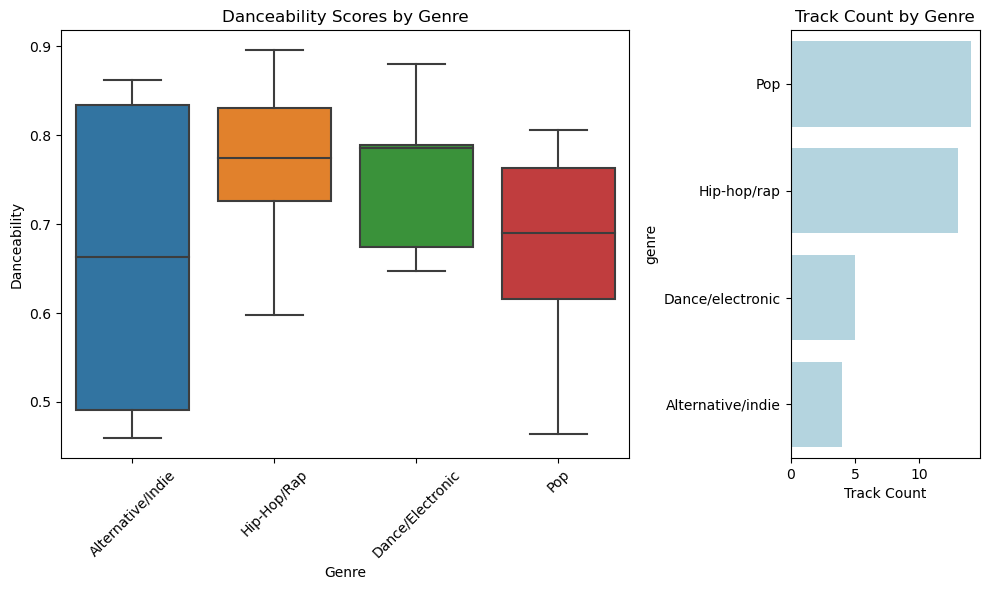

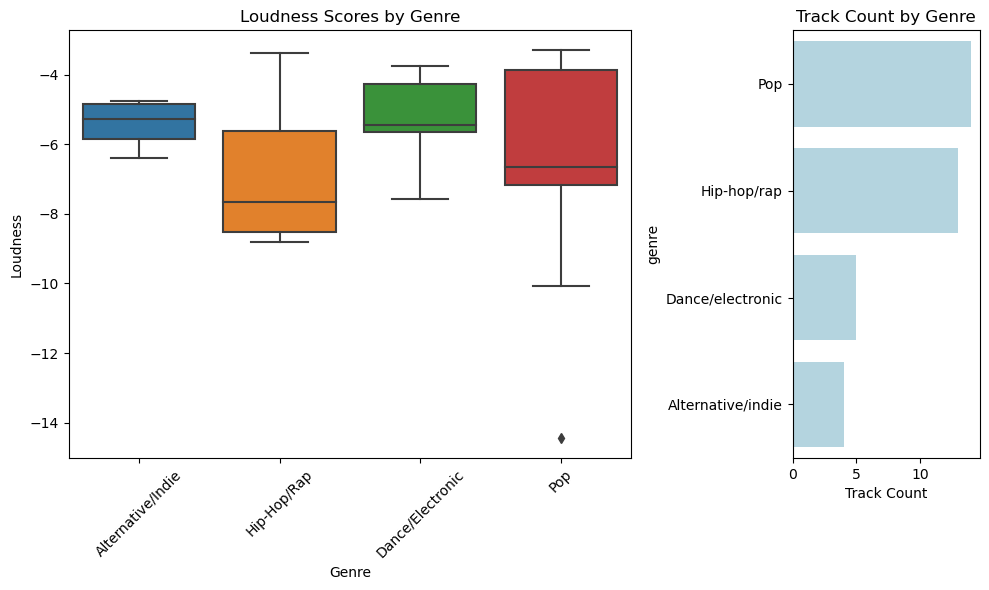

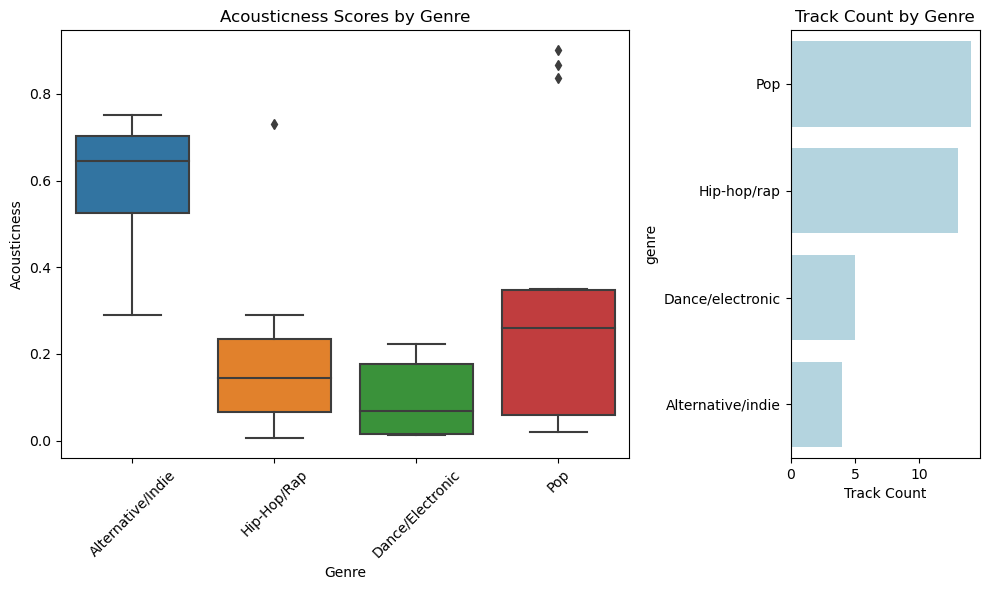

In [52]:
# Rest of your code (including the for loop for EDA) ...

# Exploratory Data Analysis
for feature in ['danceability', 'loudness', 'acousticness']:
    plt.figure(figsize=(10, 6))
    
    # Create a subplot with two side-by-side axes
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])

    # Box plot
    sns.boxplot(x='genre', y=feature, data=genre_data, ax=ax0)
    ax0.set_title(f'{feature.capitalize()} Scores by Genre')
    ax0.set_xlabel('Genre')
    ax0.set_ylabel(feature.capitalize())
    ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45)

    # Count of tracks with genre names
    genre_counts = genre_data['genre'].value_counts().reset_index()
    genre_counts.columns = ['genre', 'Track Count']
    sns.barplot(x='Track Count', y='genre', data=genre_counts, ax=ax1, color='lightblue')
    ax1.set_xlabel('Track Count')
    ax1.set_title('Track Count by Genre')
    ax1.set_yticklabels([genre.capitalize() for genre in genre_counts['genre']])
    ax1.set_xlabel('Track Count')
    plt.tight_layout()
    plt.show()


In [ ]:
# Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results you got, and what these results mean.
# General Achievement of the Code and Research:

# The provided code and research aim to analyze and compare specific audio features (danceability, loudness, and acousticness) across different music genres (Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie). The goal is to understand how these features vary within and between these popular music genres.

# Comparison of Danceability:

# Danceability is an audio feature that quantifies how suitable a track is for dancing. Here's the general achievement and observations regarding danceability:

# Visual Comparison: The code creates visual comparisons, such as box plots or violin plots, to show how danceability scores are distributed across the four genres. These visualizations allow us to see the central tendency and spread of scores within each genre.

# Interpretation: Based on the visualizations and summary statistics, the code aims to provide insights into how danceability varies across genres. For example, Dance/Electronic tracks might have the highest average danceability score, indicating that they are generally more danceable. In contrast, Alternative/Indie tracks might have a lower average danceability score.

# Statistical Testing (Optional): The code suggests the option of performing statistical tests to determine if the differences in danceability scores are statistically significant. This helps provide stronger evidence for observed variations.

In [ ]:
# Comparison of Loudness:

# Loudness measures the volume or intensity of a track. Here's what the research aims to achieve regarding loudness:

# Visual Comparison: The code generates visual comparisons, similar to danceability, to depict how loudness scores are distributed across the selected genres.

# Interpretation: The analysis aims to interpret how loudness varies among the genres. For instance, Hip-Hop/Rap tracks might have a higher average loudness, indicating they are generally louder, while Alternative/Indie tracks may have a lower average loudness.

# Statistical Testing (Optional): Like with danceability, statistical tests can be employed to test whether the differences in loudness scores are statistically significant.



In [ ]:
# Comparison of Acousticness:

# Acousticness quantifies the degree to which a track is acoustic (unplugged) or electronic. Here's what the research seeks to achieve with acousticness:

# Visual Comparison: Similar to the previous features, the code uses visualizations to illustrate how acousticness scores are distributed across the genres.

# Interpretation: The analysis aims to interpret how acousticness varies among the genres. For example, Alternative/Indie tracks might have a higher average acousticness, indicating a more acoustic or unplugged sound, while Dance/Electronic tracks may have a lower average acousticness, suggesting a more electronic sound.

# Statistical Testing (Optional): Statistical tests can be used to ascertain whether the differences in acousticness scores are statistically significant.


In [ ]:
# Overall Research Impact:

# The research conducted using the code provides insights into the audio characteristics of songs within the specified music genres. These insights can be valuable for various stakeholders, including music industry professionals, music enthusiasts, and researchers. For instance, the findings may help record labels understand genre-specific trends, and music enthusiasts can use this information to discover tracks that align with their preferences. Researchers may gain insights into the evolving sound characteristics of popular genres.


In [ ]:
# Suggestions for Improvement:

# Provide suggestions about how your analysis can be improved.

# The research could be enhanced in the following ways:

# Expanding the genre list: Including more genres for comparison would provide a broader perspective on audio feature variations.

# Examining correlations: Analyzing how these audio features correlate with other features or with song popularity can offer deeper insights.

# Including more advanced statistical analysis: Conducting in-depth statistical analysis with larger datasets can yield more robust conclusions.

# Addressing potential biases: Ensuring that the data represents various sub-genres and artists within each genre can enhance the research's comprehensiveness.

# In summary, the code and research aim to explore how specific audio features differ among popular music genres, providing valuable insights into the characteristics of these genres and room for further analysis and improvements.
